In [135]:
import sys
sys.path.append('/home/lenizio/datascience/diabetes_project')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import models 
import seaborn as sns
import tensorflow as tf
import sklearn
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer 
from models import neural_network as nn
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [136]:
diabetes = pd.read_csv(r"/home/lenizio/datascience/diabetes_project/data/diabetes_prediction_dataset.csv")

In [137]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [138]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [139]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [140]:
mask = diabetes.age < 18

In [141]:
mask.value_counts()

age
False    82781
True     17219
Name: count, dtype: int64

In [142]:
diabetes_filtered = diabetes[~mask]

In [143]:
diabetes_filtered

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [144]:
diabetes_filtered.gender.value_counts()

gender
Female    50096
Male      32671
Other        14
Name: count, dtype: int64

In [145]:
mapping = {'Female' : 0 ,'Male':1, 'Other': 2}
diabetes_filtered.iloc[:,0]= diabetes_filtered.iloc[:,0].replace(mapping)

In [146]:
smoking_count= np.unique(diabetes_filtered.smoking_history.values)
mapping_ = {key : value for value, key in enumerate(smoking_count)}
diabetes_filtered.iloc[:,4] = diabetes_filtered.iloc[:,4].replace(mapping_)

In [147]:
diabetes_filtered.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,82781.000000,82781.000000,82781.000000,82781.000000,82781.000000,82781.000000,82781.000000
mean,48.856682,0.090335,0.047559,28.624039,5.550667,139.090045,0.101690
std,18.014698,0.286662,0.212833,6.062665,1.087554,41.792024,0.302242
min,18.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,34.000000,0.000000,0.000000,25.560000,4.800000,100.000000,0.000000
50%,49.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,63.000000,0.000000,0.000000,30.650000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,91.820000,9.000000,300.000000,1.000000


In [148]:
mapping_

{'No Info': 0,
 'current': 1,
 'ever': 2,
 'former': 3,
 'never': 4,
 'not current': 5}

In [149]:

metrics = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='mse'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [150]:
def model_builder(hidden_layers, learning_rate_, lambda_,input_shape_, number_labels):   
    
    model = keras.Sequential()
    
    
    model.add(keras.Input(shape=(input_shape_)))
    
    for i in range(len(hidden_layers)):
        model.add(keras.layers.Dense(units=hidden_layers[i], activation='relu',
                                     kernel_regularizer=keras.regularizers.l2(lambda_))
                  )
    
    model.add(keras.layers.Dense(units=number_labels,
                                 kernel_regularizer=keras.regularizers.l2(lambda_))
              )       

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_),
                metrics=metrics
)
    return model

In [151]:
X = diabetes_filtered.iloc[:,0:8].values
Y = diabetes_filtered.iloc[:,8].values
x_train, x, y_train, y = train_test_split(X, Y, test_size= 0.40)
x_val, x_test, y_val, y_test = train_test_split(x, y, test_size= 0.50)

In [153]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [156]:
model = model_builder([8,4], 0.001, 0.01, x_train.shape[-1],1)

In [157]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
history = model.fit(x_train,y_train, epochs=100, validation_data=(x_val,y_val))

Epoch 1/100
1553/1553 [==============================] - 10s 4ms/step - loss: 0.3259 - cross entropy: 1.1424 - mse: 10.7947 - tp: 564.0000 - fp: 27.0000 - tn: 44632.0000 - fn: 4445.0000 - accuracy: 0.9100 - precision: 0.9543 - recall: 0.1126 - auc: 0.6377 - prc: 0.3701 - val_loss: 0.2231 - val_cross entropy: 0.7493 - val_mse: 13.7558 - val_tp: 848.0000 - val_fp: 30.0000 - val_tn: 14743.0000 - val_fn: 935.0000 - val_accuracy: 0.9417 - val_precision: 0.9658 - val_recall: 0.4756 - val_auc: 0.7811 - val_prc: 0.6487
Epoch 2/100
1553/1553 [==============================] - 6s 4ms/step - loss: 0.2061 - cross entropy: 0.6996 - mse: 14.4702 - tp: 2427.0000 - fp: 88.0000 - tn: 44571.0000 - fn: 2582.0000 - accuracy: 0.9462 - precision: 0.9650 - recall: 0.4845 - auc: 0.7809 - prc: 0.6445 - val_loss: 0.2056 - val_cross entropy: 0.7655 - val_mse: 15.3436 - val_tp: 873.0000 - val_fp: 35.0000 - val_tn: 14738.0000 - val_fn: 910.0000 - val_accuracy: 0.9429 - val_precision: 0.9615 - val_recall: 0.4896 - 

In [165]:
history.history.keys()



dict_keys(['loss', 'cross entropy', 'mse', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_cross entropy', 'val_mse', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc'])

In [170]:
def plot_metrics(history):
    
    metrics = ['loss', 'recall', 'precision','prc']
    plt.figure(figsize=(15,10))
    
    for n, metric in enumerate(metrics):
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], label= 'Train')
        plt.plot(history.epoch, history.history['val_'+metric], label= 'Val', linestyle= "--")
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        
        plt.legend()    

        

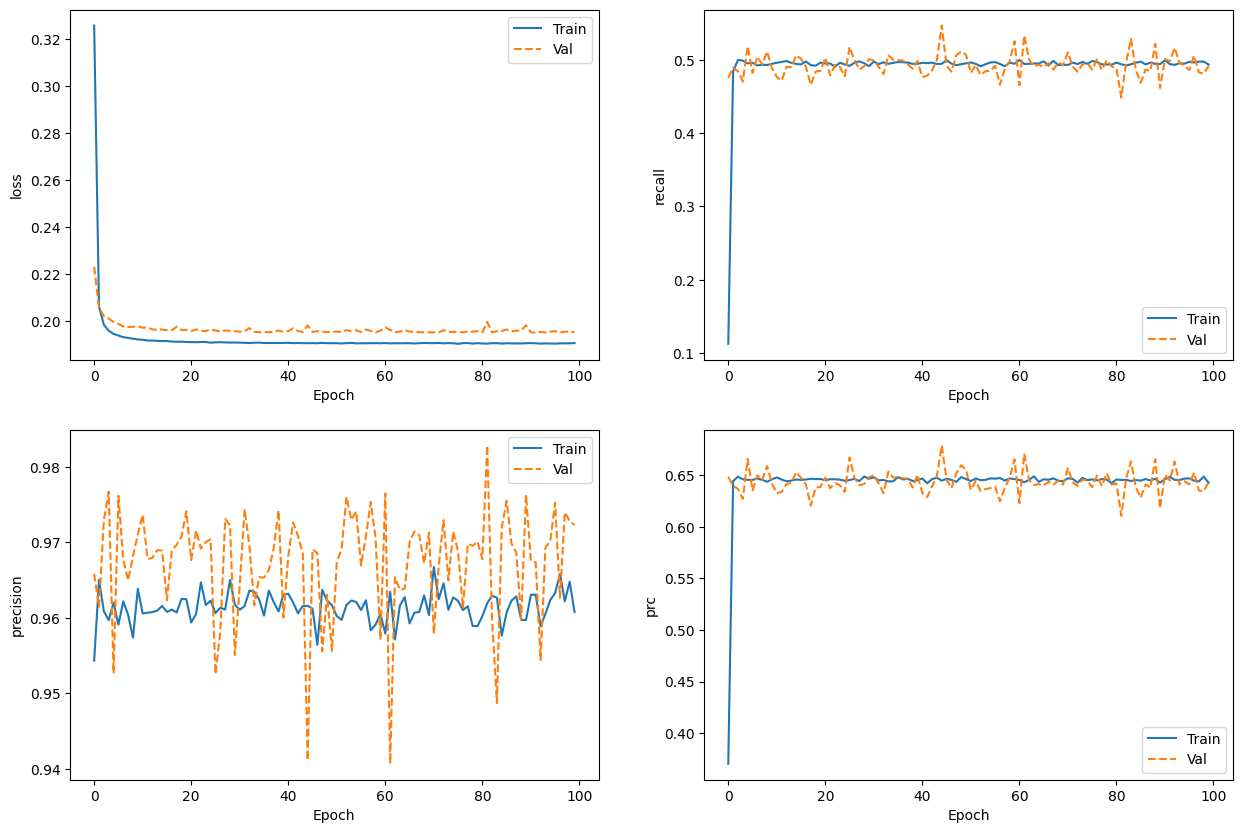

In [171]:
plot_metrics(history)

In [172]:
pred= model.predict(x_test)

518/518 [==============================] - 3s 3ms/step


In [174]:
pred = tf.nn.sigmoid(pred)

In [179]:
def plot_confusion_matrix(pred, labels, threshold):
    cm = confusion_matrix(labels, pred > threshold)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(threshold))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    

In [184]:
thresholds = np.arange(0.1,0.7,0.1)


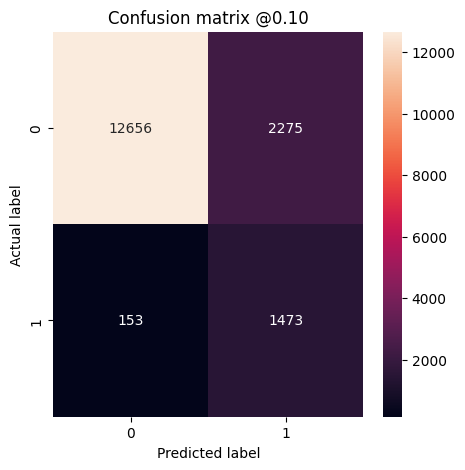

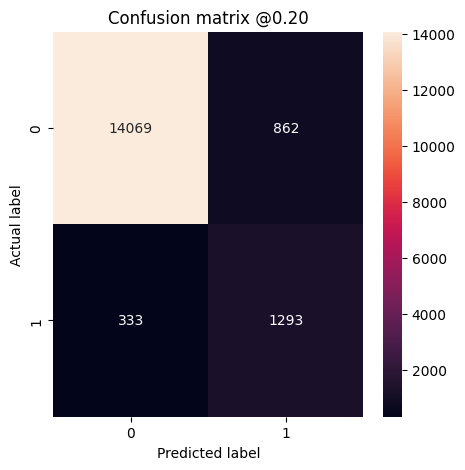

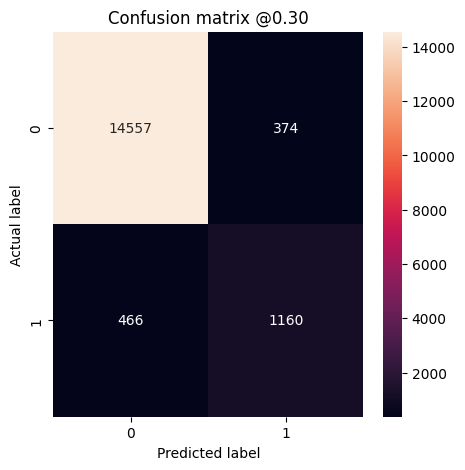

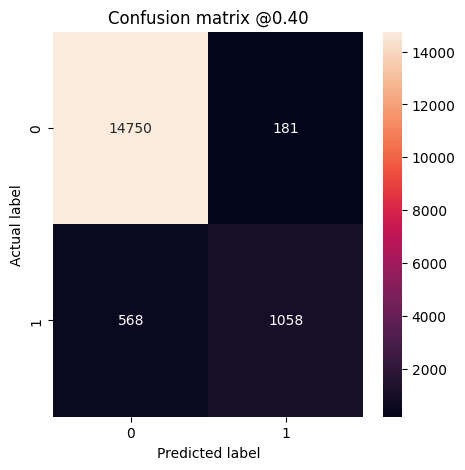

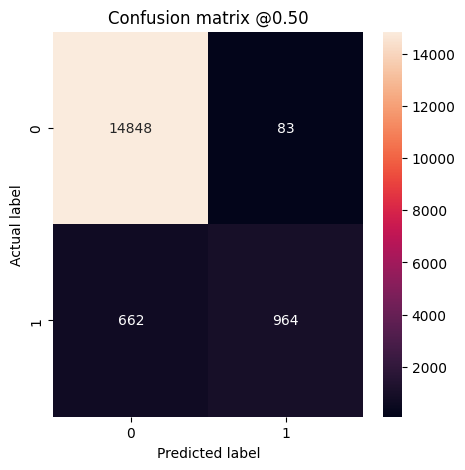

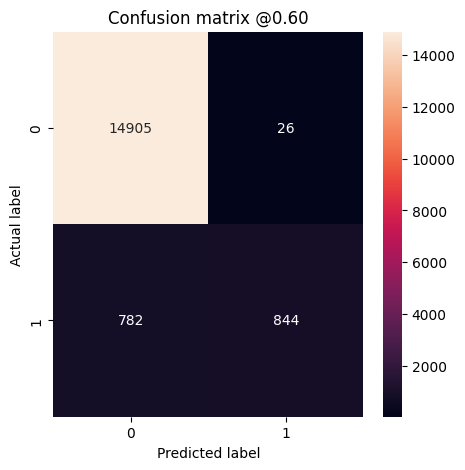

In [185]:
for threshold in thresholds:
    plot_confusion_matrix(pred, y_test, threshold)

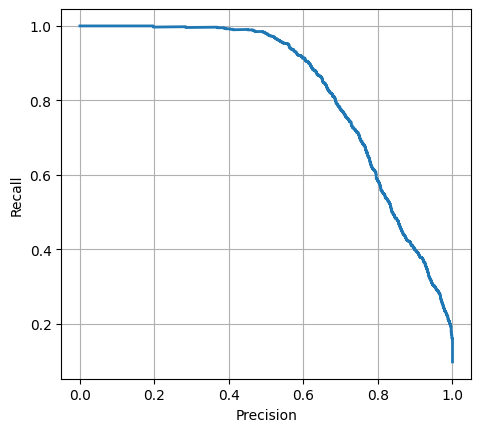

In [188]:
precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, pred)

plt.plot( recall,precision, linewidth=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal')

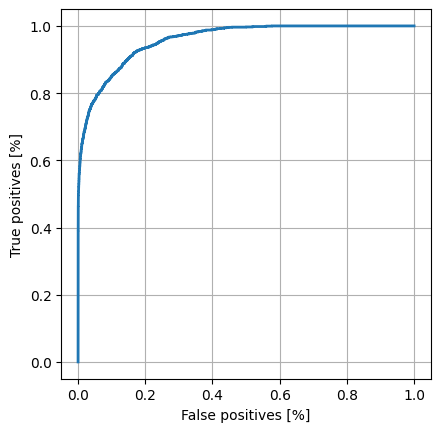

In [190]:
fp, tp, _ = sklearn.metrics.roc_curve(y_test, pred)

plt.plot(fp, tp, linewidth=2)
plt.xlabel('False positives [%]')
plt.ylabel('True positives [%]')
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal')